In [136]:
import prophet
import polars as pl
from pathlib import Path,PosixPath


In [137]:
lista_files=list(Path("data_monthly").glob("*.csv"))
lista_files

[PosixPath('data_monthly/IT-NO_2021_monthly.csv'),
 PosixPath('data_monthly/IT-NO_2023_monthly.csv'),
 PosixPath('data_monthly/IT-NO_2022_monthly.csv'),
 PosixPath('data_monthly/IT-NO_2024_monthly.csv')]

In [138]:
dataframes=[]
for file in lista_files:
    df=pl.read_csv(file)
    dataframes.append(df)
    
df=pl.concat(dataframes, how="vertical_relaxed")
df_pandas=df.to_pandas()
df

Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source
str,str,str,str,f64,f64,f64,f64,str
"""2021-01-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",286.53,365.93,40.99,31.64,"""entsoe.eu"""
"""2021-02-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",259.4,331.89,47.6,34.02,"""entsoe.eu"""
"""2021-03-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",255.73,329.69,47.09,34.42,"""entsoe.eu"""
"""2021-04-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",271.09,347.78,44.24,36.04,"""entsoe.eu"""
"""2021-05-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",192.78,252.23,60.82,50.04,"""entsoe.eu"""
…,…,…,…,…,…,…,…,…
"""2024-08-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",181.05,237.83,62.34,48.86,"""Electricity Maps Estimation; e…"
"""2024-09-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",196.22,255.74,58.82,45.64,"""entsoe.eu"""
"""2024-10-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",178.46,230.32,63.78,50.16,"""entsoe.eu"""


In [139]:
df=df.rename({"Datetime (UTC)":"ds","Renewable Percentage":"y"})
df

ds,Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,y,Data Source
str,str,str,str,f64,f64,f64,f64,str
"""2021-01-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",286.53,365.93,40.99,31.64,"""entsoe.eu"""
"""2021-02-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",259.4,331.89,47.6,34.02,"""entsoe.eu"""
"""2021-03-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",255.73,329.69,47.09,34.42,"""entsoe.eu"""
"""2021-04-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",271.09,347.78,44.24,36.04,"""entsoe.eu"""
"""2021-05-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",192.78,252.23,60.82,50.04,"""entsoe.eu"""
…,…,…,…,…,…,…,…,…
"""2024-08-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",181.05,237.83,62.34,48.86,"""Electricity Maps Estimation; e…"
"""2024-09-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",196.22,255.74,58.82,45.64,"""entsoe.eu"""
"""2024-10-01 00:00:00""","""Italy""","""North Italy""","""IT-NO""",178.46,230.32,63.78,50.16,"""entsoe.eu"""


In [140]:
df_pred=df.select(["ds","y"])
df_pred

ds,y
str,f64
"""2021-01-01 00:00:00""",31.64
"""2021-02-01 00:00:00""",34.02
"""2021-03-01 00:00:00""",34.42
"""2021-04-01 00:00:00""",36.04
"""2021-05-01 00:00:00""",50.04
…,…
"""2024-08-01 00:00:00""",48.86
"""2024-09-01 00:00:00""",45.64
"""2024-10-01 00:00:00""",50.16


<AxesSubplot: xlabel='Datetime (UTC)'>

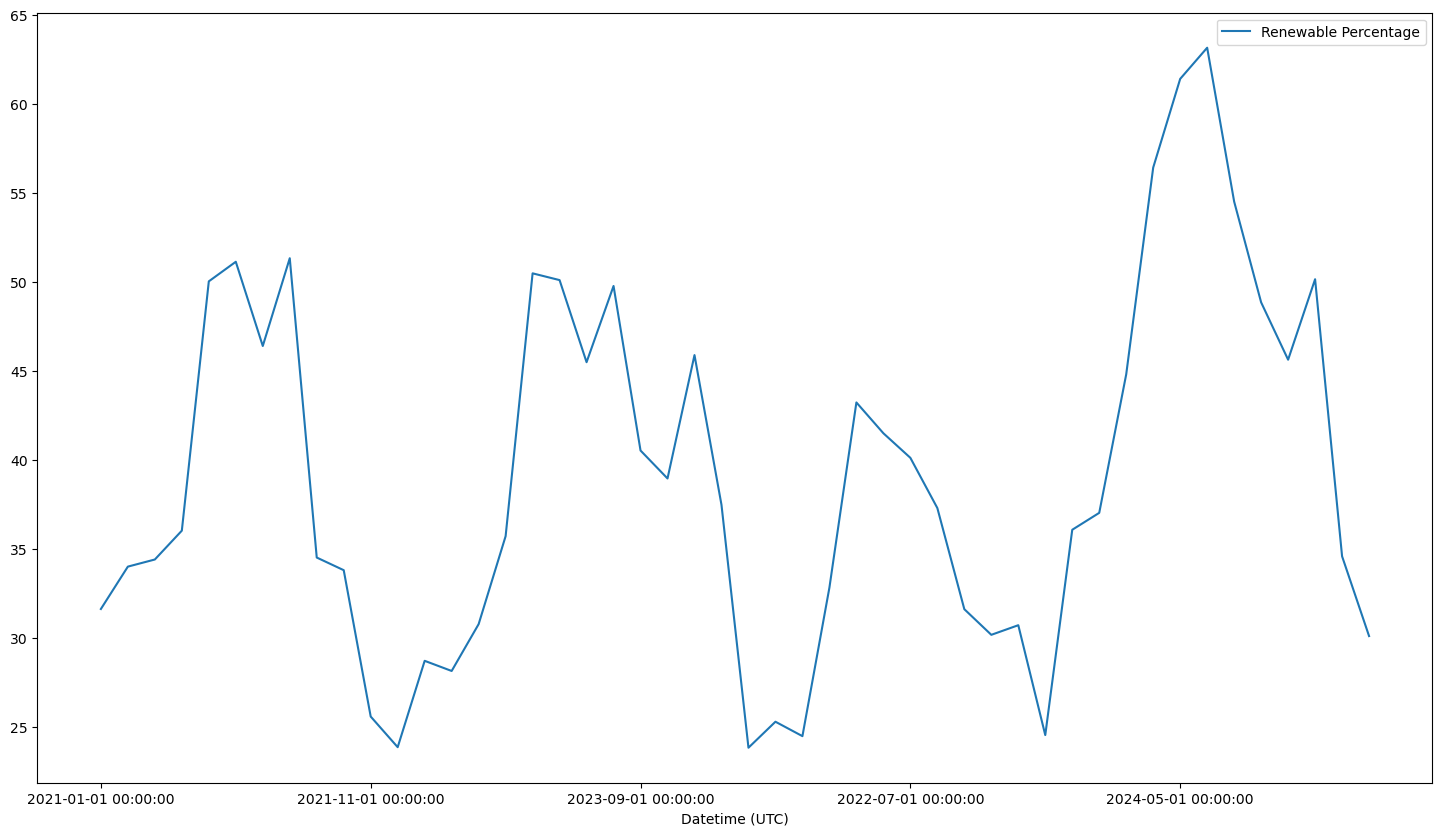

In [141]:
df_pandas.plot(x='Datetime (UTC)',y='Renewable Percentage',figsize=(18,10))

In [142]:
from prophet import Prophet
df_pred=df_pred.with_columns( 
    pl.col("ds").str.strptime(pl.Datetime)
)
df_pred


ds,y
datetime[μs],f64
2021-01-01 00:00:00,31.64
2021-02-01 00:00:00,34.02
2021-03-01 00:00:00,34.42
2021-04-01 00:00:00,36.04
2021-05-01 00:00:00,50.04
…,…
2024-08-01 00:00:00,48.86
2024-09-01 00:00:00,45.64
2024-10-01 00:00:00,50.16


In [143]:
import pandas as pd
df=df_pred.to_pandas()
df["ds"]=pd.to_datetime(df["ds"])

In [144]:
m = Prophet(yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False,interval_width=0.95)
model = m.fit(df)

14:40:45 - cmdstanpy - INFO - Chain [1] start processing


14:40:45 - cmdstanpy - INFO - Chain [1] done processing


In [145]:
future = model.make_future_dataframe(periods=6,freq = 'MS')
future.tail()

,ds
49,2025-02-01
50,2025-03-01
51,2025-04-01
52,2025-05-01
53,2025-06-01


In [146]:
len(future)

54

In [147]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,52.651502,1237.649740,1274.769763,52.651502,52.651502,1203.199958,1203.199958,1203.199958,1203.199958,1203.199958,1203.199958,0.0,0.0,0.0,1255.851460
1,2021-02-01,52.839642,898.534094,933.465585,52.839642,52.839642,862.981319,862.981319,862.981319,862.981319,862.981319,862.981319,0.0,0.0,0.0,915.820960
2,2021-03-01,53.009574,-658.334597,-623.993299,53.009574,53.009574,-693.973939,-693.973939,-693.973939,-693.973939,-693.973939,-693.973939,0.0,0.0,0.0,-640.964365
3,2021-04-01,53.197714,-235.938592,-200.539339,53.197714,53.197714,-271.738957,-271.738957,-271.738957,-271.738957,-271.738957,-271.738957,0.0,0.0,0.0,-218.541243
4,2021-05-01,53.379784,42.961916,77.973930,53.379784,53.379784,7.340414,7.340414,7.340414,7.340414,7.340414,7.340414,0.0,0.0,0.0,60.720198
5,2021-06-01,53.567923,133.134764,168.883828,53.567923,53.567923,97.510885,97.510885,97.510885,97.510885,97.510885,97.510885,0.0,0.0,0.0,151.078808
6,2021-07-01,53.749994,104.552969,140.990393,53.749994,53.749994,69.303339,69.303339,69.303339,69.303339,69.303339,69.303339,0.0,0.0,0.0,123.053333
7,2021-08-01,53.938133,-5.004549,30.226551,53.938133,53.938133,-41.576192,-41.576192,-41.576192,-41.576192,-41.576192,-41.576192,0.0,0.0,0.0,12.361941
8,2021-09-01,54.126273,-151.594602,-116.486453,54.126273,54.126273,-187.693766,-187.693766,-187.693766,-187.693766,-187.693766,-187.693766,0.0,0.0,0.0,-133.567493
9,2021-10-01,54.308343,-303.621671,-268.636628,54.308343,54.308343,-340.676637,-340.676637,-340.676637,-340.676637,-340.676637,-340.676637,0.0,0.0,0.0,-286.368294


In [148]:
forecast.to_csv("forecast.csv")

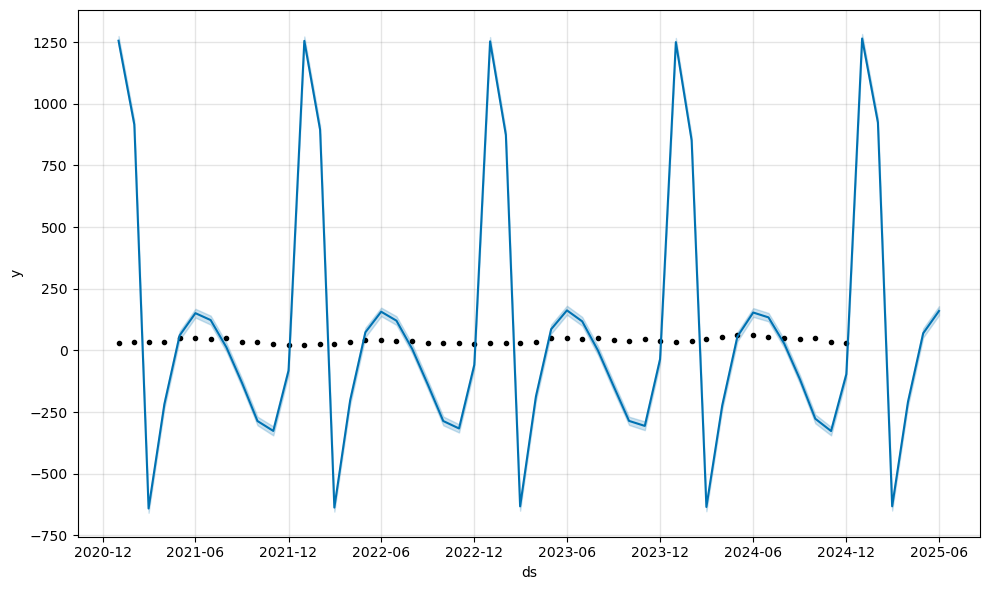

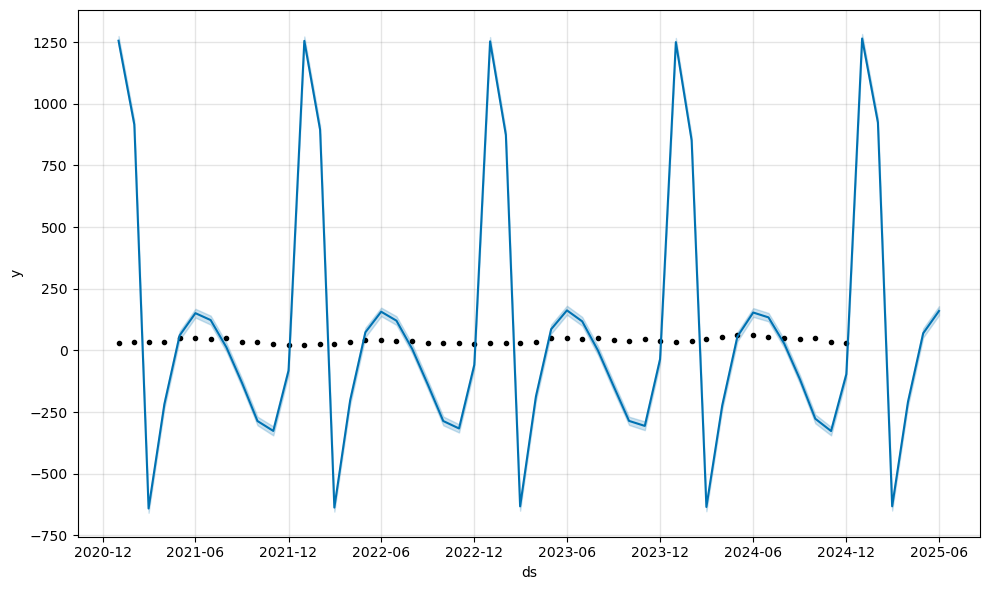

In [149]:
model.plot(forecast)